In [110]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [111]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../CSV/MSFT_kaggle.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
start = 4000 #from 2002
end = 9000 #to 2021
df = df[start:end]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-16,34.424999,34.919998,33.924999,33.935001,21.443295,61955400
2002-01-17,34.264999,35.000000,34.200001,34.930000,22.072027,78958000
2002-01-18,33.549999,33.924999,32.709999,33.049999,20.884069,107140400
2002-01-22,33.305000,33.314999,32.125000,32.230000,20.365915,76837200
2002-01-23,32.025002,32.355000,31.620001,31.870001,20.138437,80403000
...,...,...,...,...,...,...
2021-11-17,338.940002,342.190002,338.000000,339.119995,338.420227,19053400
2021-11-18,338.179993,342.450012,337.119995,341.269989,340.565796,22463500
2021-11-19,342.640015,345.100006,342.200012,343.109985,342.402008,21963400


<AxesSubplot:xlabel='Date'>

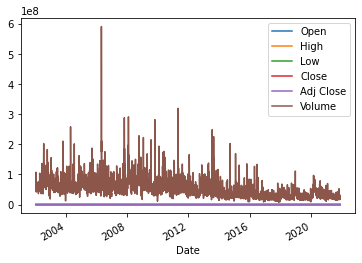

In [112]:
df.plot()

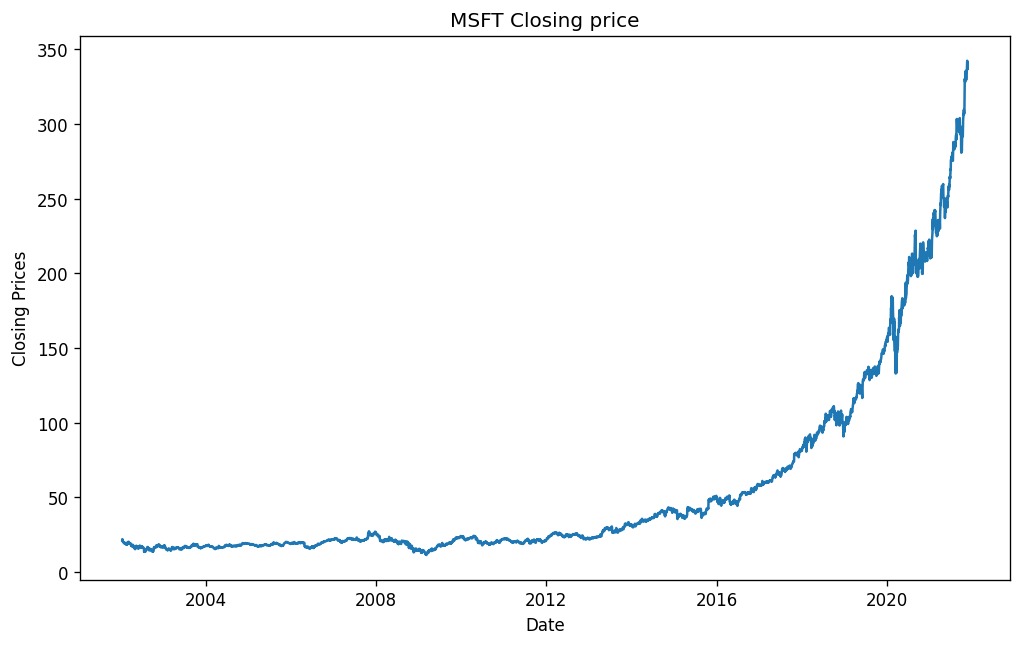

5000

In [123]:
#plot close price
plt.figure(figsize=(10,6), dpi=120)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df['Adj Close'])
plt.title('MSFT Closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

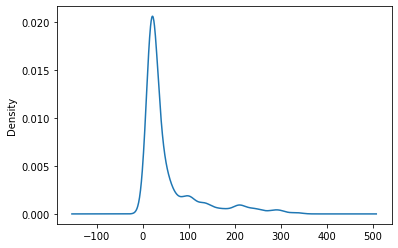

In [114]:
#Distribution of the dataset
df_close = df['Adj Close']
df_close.plot(kind='kde')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


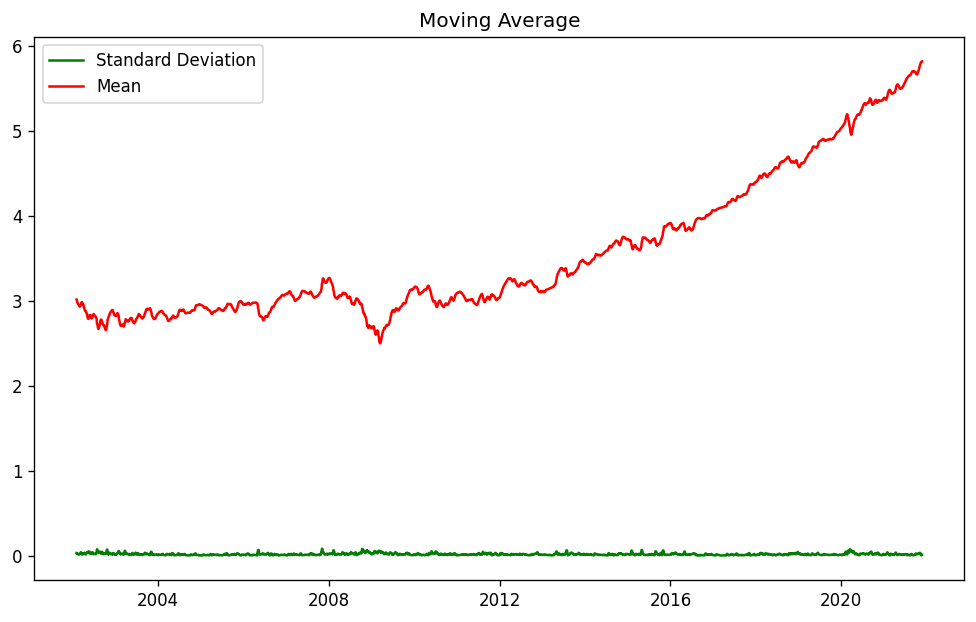

In [180]:
# if not stationary then eliminate trend
# Eliminate trend
from pylab import rcParams
# rcParams['figure.figsize'] = 10, 6
plt.figure(figsize=(10,6), dpi=120)
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="green", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
# plt.show()

In [160]:
#split data into train and training set

to_row = int(len(df)*0.9)
train_data = list(df[0:to_row]['Adj Close']) #4500
testing_data = list(df[to_row:]['Adj Close']) #500

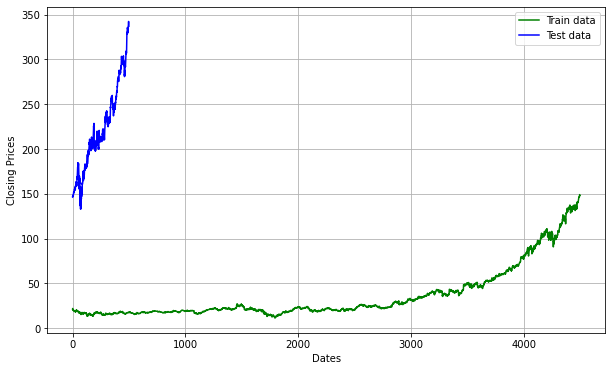

In [161]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(testing_data, 'blue', label='Test data')
plt.legend()

In [162]:
model_predictions = []
test_observations = len(testing_data)

In [171]:
for i in range(test_observations):
    model = ARIMA(train_data, order = (4,1,0)) #p d q
    model_fitted = model.fit()
    out = model_fitted.forecast()
    y_ = out[0]
    model_predictions.append(y_)
    actual_val_test = testing_data[i]
    train_data.append(actual_val_test)
    # break

In [185]:
print(model_fitted.summary()) #stats

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4999
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -8766.694
Date:                Sun, 22 May 2022   AIC                          17543.388
Time:                        21:52:59   BIC                          17575.972
Sample:                             0   HQIC                         17554.808
                               - 4999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1912      0.004    -46.984      0.000      -0.199      -0.183
ar.L2          0.0334      0.004      7.999      0.000       0.025       0.042
ar.L3          0.0093      0.005      1.867      0.0

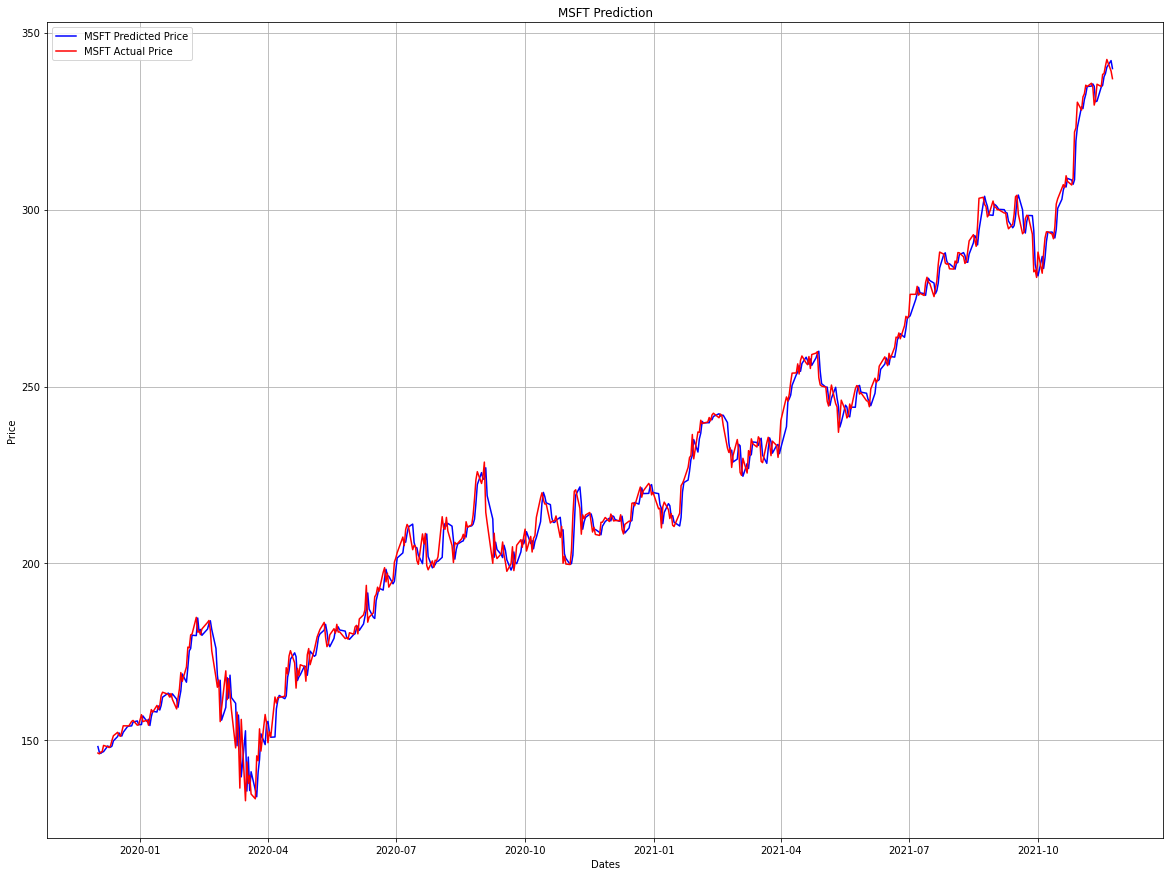

In [183]:
plt.figure(figsize=(20,15))
plt.grid(True)
data_range = df[to_row:].index

plt.plot(data_range, model_predictions, color='blue', label='MSFT Predicted Price')
plt.plot(data_range, testing_data, color='red', label='MSFT Actual Price')
plt.title('MSFT Prediction')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend()
plt.show()

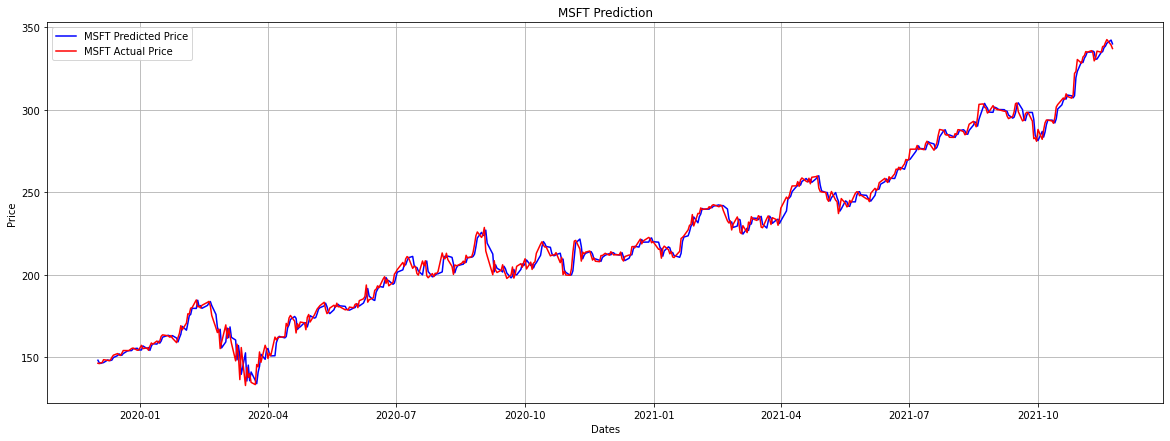

In [178]:
plt.figure(figsize=(20,7))
plt.grid(True)
data_range = df[to_row:].index

plt.plot(data_range, model_predictions, color='blue', label='MSFT Predicted Price')
plt.plot(data_range, testing_data, color='red', label='MSFT Actual Price')
plt.title('MSFT Prediction')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend()
plt.show()

In [184]:
# model_autoARIMA = auto_arima(df['Date'], start_p=0, start_q=0,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=5,              # frequency of series
#                       d=None,           # let model determine 'd'
#                                         # automatically discovers the optimal order for ARIMA
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=1, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)
# print(model_autoARIMA.summary())
# model_autoARIMA.plot_diagnostics(figsize=(15,8))
# plt.show()